In [191]:
import pandas as pd
pd.set_option('display.max_rows', None)

# Generate Main Table

In [52]:
def to_float(val):
   return float(val.replace("%", ""))/100

In [287]:
sleep = pd.read_csv("sleepdata.csv", sep = ";")
sleep = sleep.drop(columns=["Mood", "Heart rate (bpm)", "City", "Did snore", "Snore time", 
                            "Weather temperature (°F)", "Weather type", "Notes", "Window start", "Window stop"])
sleep['Start'] = pd.to_datetime(sleep['Start'])
sleep['End'] = pd.to_datetime(sleep['End'])
sleep = sleep.rename(columns={"Start": "tracking_start", "End": "tracking_end", 
                             "Sleep Quality": "quality", "Regularity": "regularity",
                             "Steps": "day_steps", "Alarm mode": "alarm", "Air Pressure (Pa)": "air_pressure",
                             "Movements per hour": "movements_per_hr", "Time in bed (seconds)": "time_total",
                             "Time asleep (seconds)": "time_asleep", "Time before sleep (seconds)": "time_presleep"})

sleep["quality"] = sleep["quality"].apply(to_float)
sleep["regularity"] = sleep["regularity"].apply(to_float)

# Heatmap: Sleep Quality Per Year

In [288]:
import matplotlib
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
import numpy as np

In [281]:
sleepqual = sleep.drop(columns=["tracking_end", "regularity", "day_steps", "alarm", "air_pressure", 
                            "movements_per_hr", "time_total", "time_asleep", "time_presleep"])
sleepqual["year"] = sleepqual["tracking_start"].dt.year
sleepqual["month"] = sleepqual["tracking_start"].dt.month
sleepqual["day"] = sleepqual["tracking_start"].dt.day
sleepqual = sleepqual.drop(columns=["tracking_start"])

# split sleep quality by year
sleepqual19 = sleepqual.loc[sleepqual["year"] == 2019]
sleepqual20 = sleepqual.loc[sleepqual["year"] == 2020]
sleepqual21 = sleepqual.loc[sleepqual["year"] == 2021]
sleepqual22 = sleepqual.loc[sleepqual["year"] == 2022]

In [270]:
def find_naps(sleepqualtab):
    targets = sleepqualtab.groupby(["month", "day"]).size()                                 
    targets = targets[targets > 1]
    return targets
    
def find_nap_indexes(sleepqualtab, targetdays): 
    naps = []
    for date, count in targetdays.iteritems():
        nap = sleepqualtab.loc[sleepqualtab["month"] == date[0]]
        nap = nap.loc[nap["day"] == date[1]]
        nap_poor = nap.loc[nap["quality"] < .5]
        if len(nap_poor.index) > 0:
            for i in range(len(nap_poor.index)):
                naps.append(nap_poor.index[0])
        else:
            for i in range(len(nap.index)):
                naps.append(nap.index[0])   
    return naps

## 2019

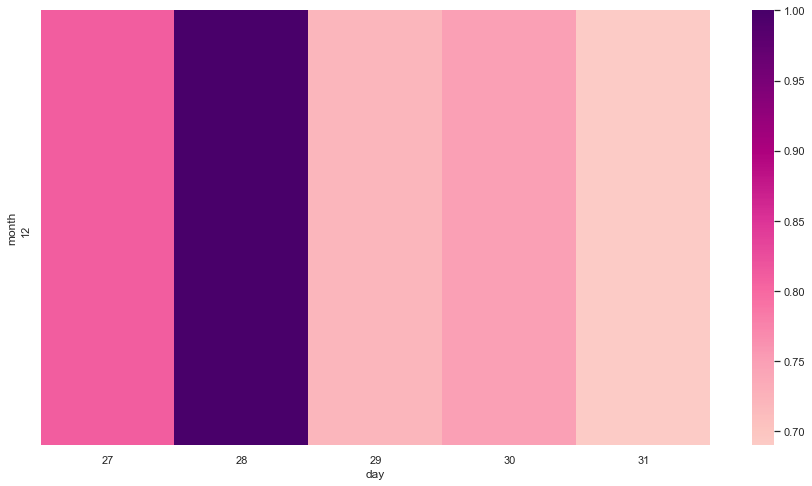

In [244]:
# 2019 SLEEP DATA
sleepqual19piv = sleepqual19.pivot("month", "day", "quality")
sleepqual19piv
map19 = sns.heatmap(sleepqual19piv, cmap = "RdPu", center = .8)

## 2020

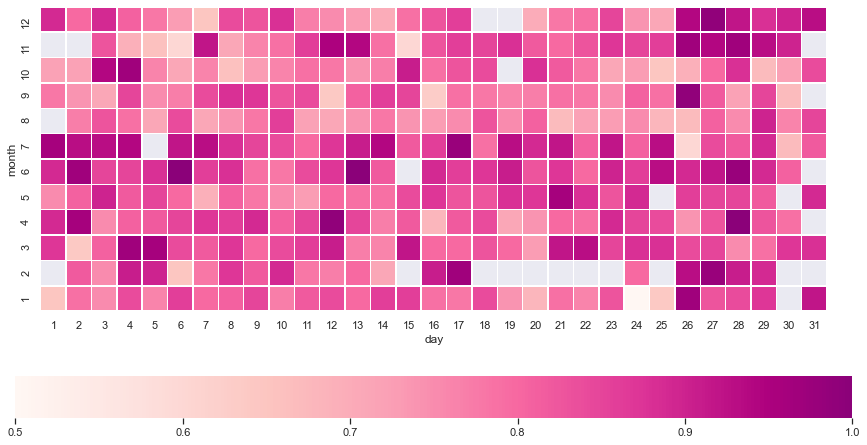

In [271]:
# 2020 SLEEP DATA

target20 = find_naps(sleepqual20)
indices20 = find_nap_indexes(sleepqual20, target20)
sleepqual20rem = sleepqual20.drop(indices20)

sleepqual20piv = sleepqual20rem.pivot("month", "day", "quality")
#gradient = sns.color_palette("#191733", as_cmap=True)
map20 = sns.heatmap(sleepqual20piv, linewidths = .5, square = True, cbar_kws={"orientation": "horizontal"},
                    cmap = "RdPu", center = .8)
map20.invert_yaxis()

## 2021

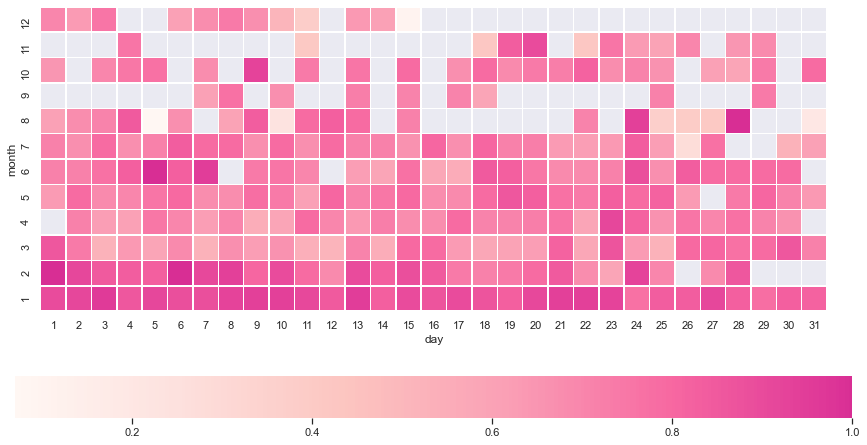

In [272]:
# 2021 SLEEP DATA

target21 = find_naps(sleepqual21)
indices21 = find_nap_indexes(sleepqual21, target21)
sleepqual21rem = sleepqual21.drop(indices21)

sleepqual21piv = sleepqual21rem.pivot("month", "day", "quality")
map21 = sns.heatmap(sleepqual21piv, linewidths = .5, square = True, cbar_kws={"orientation": "horizontal"},
                    cmap = "RdPu", center = .8)
map21.invert_yaxis()

## 2022

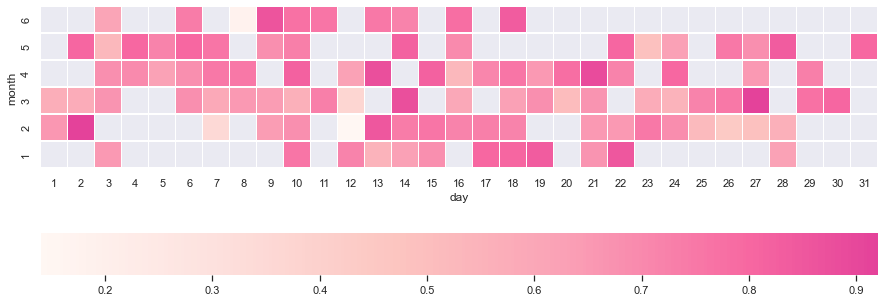

In [286]:
# 2022 SLEEP DATA

target22 = find_naps(sleepqual22)
indices22 = find_nap_indexes(sleepqual22, target22)
sleepqual22rem = sleepqual22.drop(indices22)
sleepqual22rem = sleepqual22rem.drop([792, 769])

sleepqual22piv = sleepqual22rem.pivot("month", "day", "quality")
map22 = sns.heatmap(sleepqual22piv, linewidths = .5, square = True, cbar_kws={"orientation": "horizontal"},
                    cmap = "RdPu", center = .8)
map22.invert_yaxis()